## Large datasets
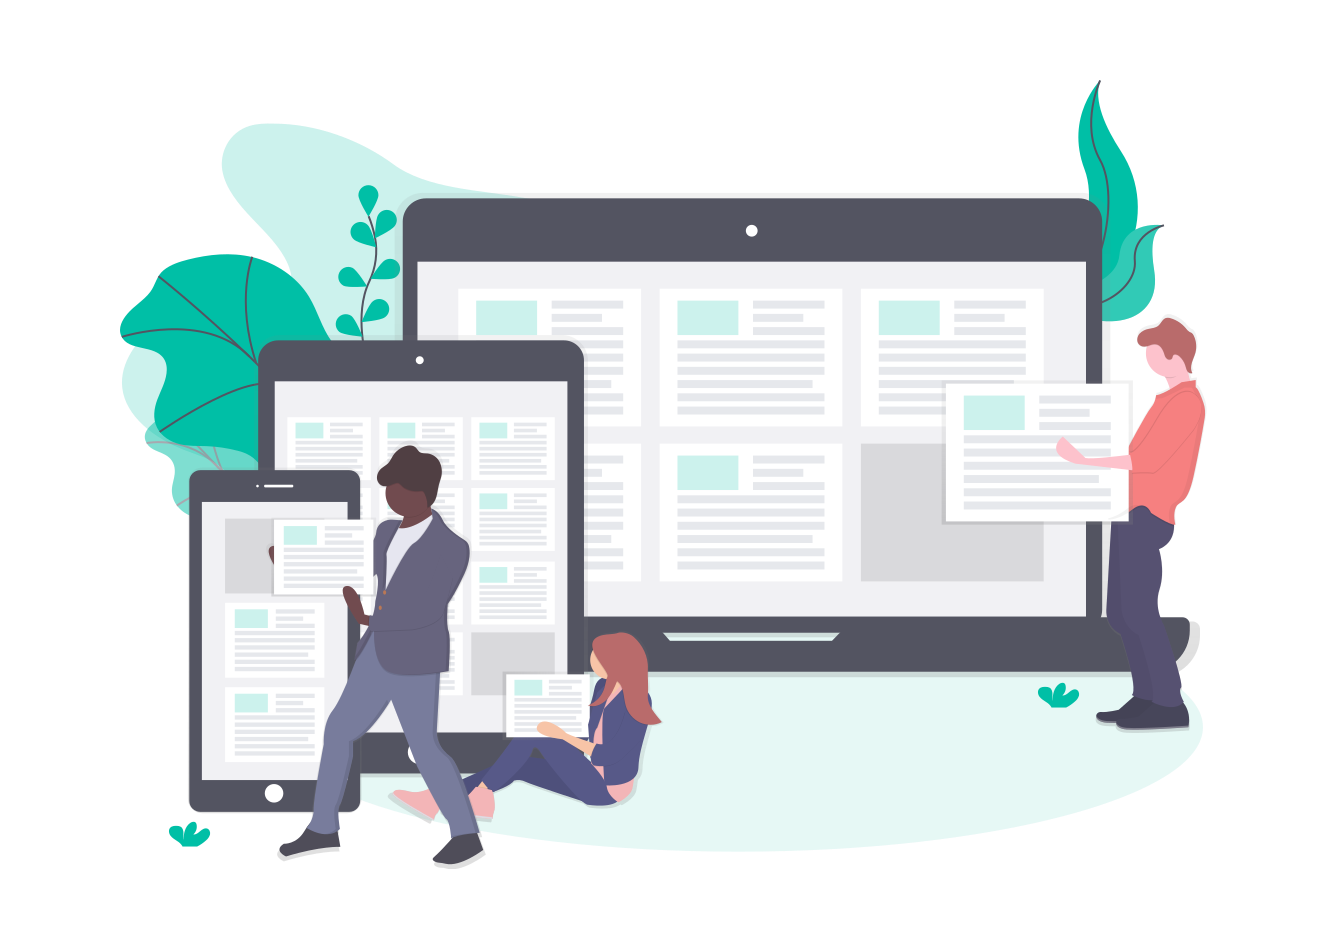

> As a Data Scientist or Kaggler, we crave for more data

How many times have you complained about not having good enough data for working on a particular problem? Plenty I'm sure.   
How many times have you complained about having too much data to work with? Maybe not many but it's still a better problem to have.

The most common resolution in the scenario of having too much data is using a part/sample of it that fits in the RAM available. But that leads to wastage of the unused data and sometimes loss of information. Many times there are ways to overcome this challenge without the need of subsampling. A single solution might not cater to all requirements and so different solutions can work in different scenarios.

This notebook aims to describe and summarize some of these techniques. The [Riiid! Answer Correctness Prediction](https://www.kaggle.com/c/riiid-test-answer-prediction) dataset is quite a nice sample to experiment on since the plain vanilla ***pd.read_csv*** will result in an out-of-memory error on Kaggle Notebooks. It has over 100 million rows and 10 columns.

Different packages have their own way of reading data. The methods explored in the notebook (Default ***pandas*** and rest alphabetically):

* [Pandas](#Method:-Pandas)
* [Dask](#Method:-Dask)
* [Datatable](#Method:-Datatable)
* [Rapids](#Method:-Rapids)

Apart from methods of reading data from the raw csv files, it is also common to convert the dataset into another format which uses lesser disk space, is smaller in size and/or can be read faster for subsequent reads. The file types explored in the notebook (Default ***csv*** and rest alphabetically):

* [csv](#Format:-csv)
* [feather](#Format:-feather)
* [hdf5](#Format:-hdf5)
* [jay](#Format:-jay)
* [parquet](#Format:-parquet)
* [pickle](#Format:-pickle)

Note that just reading data is not the end of the story. The final decision of which method to use should also consider the downstream tasks and processes of the data that will be required to run. But that is outside the scope of this notebook.

You will also find that for different datasets or different environments, there will be different methods that work best. So there is no clear winner as such.

Feel free to share other approaches that can be added to this list.

## Methods
Before exploring various methods let's once confirm that reading the dataset using the default pandas setting fails.

In [ ]:
import pandas as pd
import dask.dataframe as dd

# confirming the default pandas doesn't work (running the below code should result in a memory error)
# data = pd.read_csv("../input/riiid-test-answer-prediction/train.csv")

## Method: Pandas
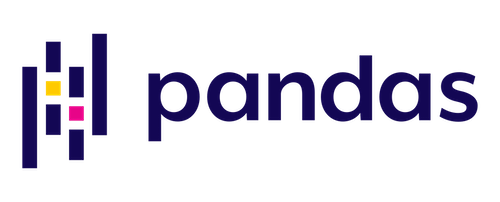

[Pandas](https://pandas.pydata.org/) is probably the most popular method of reading datasets and is also the default on Kaggle. It has a lot of options, flexibility and functions for reading and processing data.

One of the challenges with using pandas for reading large datasets is it's conservative nature while infering data types of the columns of a dataset often resulting in unnecessary large memory usage for the pandas dataframe. You can pre-define optimal data types of the columns (based on prior knowledge or sample inspection) and provide it explicitly while reading the dataset.

This is the method used in the [official starter notebook of the RiiiD competition](https://www.kaggle.com/sohier/competition-api-detailed-introduction) as well.

Documentation: https://pandas.pydata.org/docs/

In [ ]:
%%time

dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

data = pd.read_csv("../input/riiid-test-answer-prediction/train.csv", dtype=dtypes)

print("Train size:", data.shape)

In [ ]:
data.head()

## Method: Dask
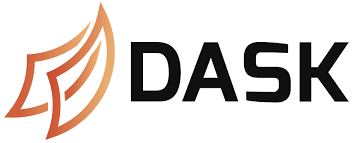

[Dask](https://dask.org/) provides a framework to scale pandas workflows natively using a parallel processing architecture. For those of you who have used [Spark](https://spark.apache.org/), you will find an uncanny similarity between the two.

Documentation: https://docs.dask.org/en/latest/

In [ ]:
%%time

dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

data = dd.read_csv("../input/riiid-test-answer-prediction/train.csv", dtype=dtypes).compute()

print("Train size:", data.shape)

In [ ]:
data.head()

## Method: Datatable
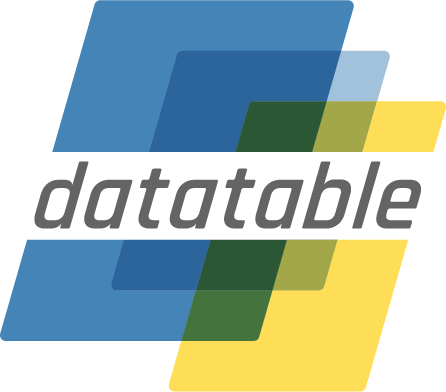

[Datatable](https://github.com/h2oai/datatable) (heavily inspired by R's data.table) can read large datasets fairly quickly and is often faster than pandas. It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data.

Documentation: https://datatable.readthedocs.io/en/latest/index.html


In [ ]:
# datatable installation with internet
# !pip install datatable==0.11.0 > /dev/null

# datatable installation without internet
!pip install ../input/python-datatable/datatable-0.11.1-cp37-cp37m-manylinux2010_x86_64.whl > /dev/null

import datatable as dt

In [ ]:
%%time

data = dt.fread("../input/riiid-test-answer-prediction/train.csv")

print("Train size:", data.shape)

In [ ]:
data.head()

## Method: Rapids
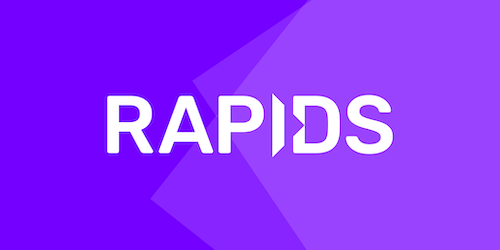

[Rapids](https://rapids.ai/) is a great option to scale data processing on GPUs. With a lot of machine learning modelling moving to GPUs, Rapids enables to build end-to-end data science solutions on one or more GPUs.

Documentation: https://docs.rapids.ai/

In [ ]:
# rapids installation (make sure to turn on GPU)
import sys
!cp ../input/rapids/rapids.0.16.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path

import cudf

In [ ]:
%%time

data = cudf.read_csv("../input/riiid-test-answer-prediction/train.csv")

print("Train size:", data.shape)

In [ ]:
data.head()

## File Formats
It is common to convert a dataset into a format which is easier or faster to read or smaller in size to store. There are various formats in which datasets can be stored though not all will be readable across different packages. Let's look at how these datasets can be converted into different formats.

Most of them are available in pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html


In [ ]:
# reading data from csv using datatable and converting to pandas
# data = dt.fread("../input/riiid-test-answer-prediction/train.csv").to_pandas()

# writing dataset as csv
# data.to_csv("riiid_train.csv", index=False)

# writing dataset as hdf5
# data.to_hdf("riiid_train.h5", "riiid_train")

# writing dataset as feather
# data.to_feather("riiid_train.feather")

# writing dataset as parquet
# data.to_parquet("riiid_train.parquet")

# writing dataset as pickle
# data.to_pickle("riiid_train.pkl.gzip")

# writing dataset as jay
# dt.Frame(data).to_jay("riiid_train.jay")

All the formats of the dataset (except csv since it's already provided in the competition) are available in this dataset: https://www.kaggle.com/rohanrao/riiid-train-data-multiple-formats

## Format: csv
Most Kaggle datasets are available in csv format and is pretty much the standard format in which datasets are shared. Almost all methods can be used to read data from csv.

Read more: https://en.wikipedia.org/wiki/Comma-separated_values

In [ ]:
%%time

dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

data = pd.read_csv("../input/riiid-test-answer-prediction/train.csv", dtype=dtypes)

print("Train size:", data.shape)

## Format: feather
It is common to store data in feather (binary) format specifically for pandas. It significantly improves reading speed of datasets.

Read more: https://arrow.apache.org/docs/python/feather.html

In [ ]:
%%time

data = pd.read_feather("../input/riiid-train-data-multiple-formats/riiid_train.feather")

print("Train size:", data.shape)

## Format: hdf5
HDF5 is a high-performance data management suite to store, manage and process large and complex data.

Read more: https://www.hdfgroup.org/solutions/hdf5

In [ ]:
%%time

data = pd.read_hdf("../input/riiid-train-data-multiple-formats/riiid_train.h5", "riiid_train")

print("Train size:", data.shape)

## Format: jay
Datatable uses .jay (binary) format which makes reading datasets blazing fast. An example notebook is shared [here](https://www.kaggle.com/rohanrao/riiid-with-blazing-fast-rid) and also shown below which reads the entire dataset in less than a second!

Read more: https://datatable.readthedocs.io/en/latest/api/frame/to_jay.html

In [ ]:
%%time

data = dt.fread("../input/riiid-train-data-multiple-formats/riiid_train.jay")

print("Train size:", data.shape)

## Format: parquet
In the Hadoop ecosystem, parquet was popularly used as the primary file format for tabular datasets and is now extensively used with Spark. It has become more available and efficient over the years and is also supported by pandas.

Read more: https://parquet.apache.org/documentation/latest/

In [ ]:
%%time

data = pd.read_parquet("../input/riiid-train-data-multiple-formats/riiid_train.parquet")

print("Train size:", data.shape)

## Format: pickle
Python objects can be stored in the form of pickle files and pandas has inbuilt functions to read and write dataframes as pickle objects.

Read more: https://docs.python.org/3/library/pickle.html

In [ ]:
%%time

data = pd.read_pickle("../input/riiid-train-data-multiple-formats/riiid_train.pkl.gzip")

print("Train size:", data.shape)

## There is no winner or loser
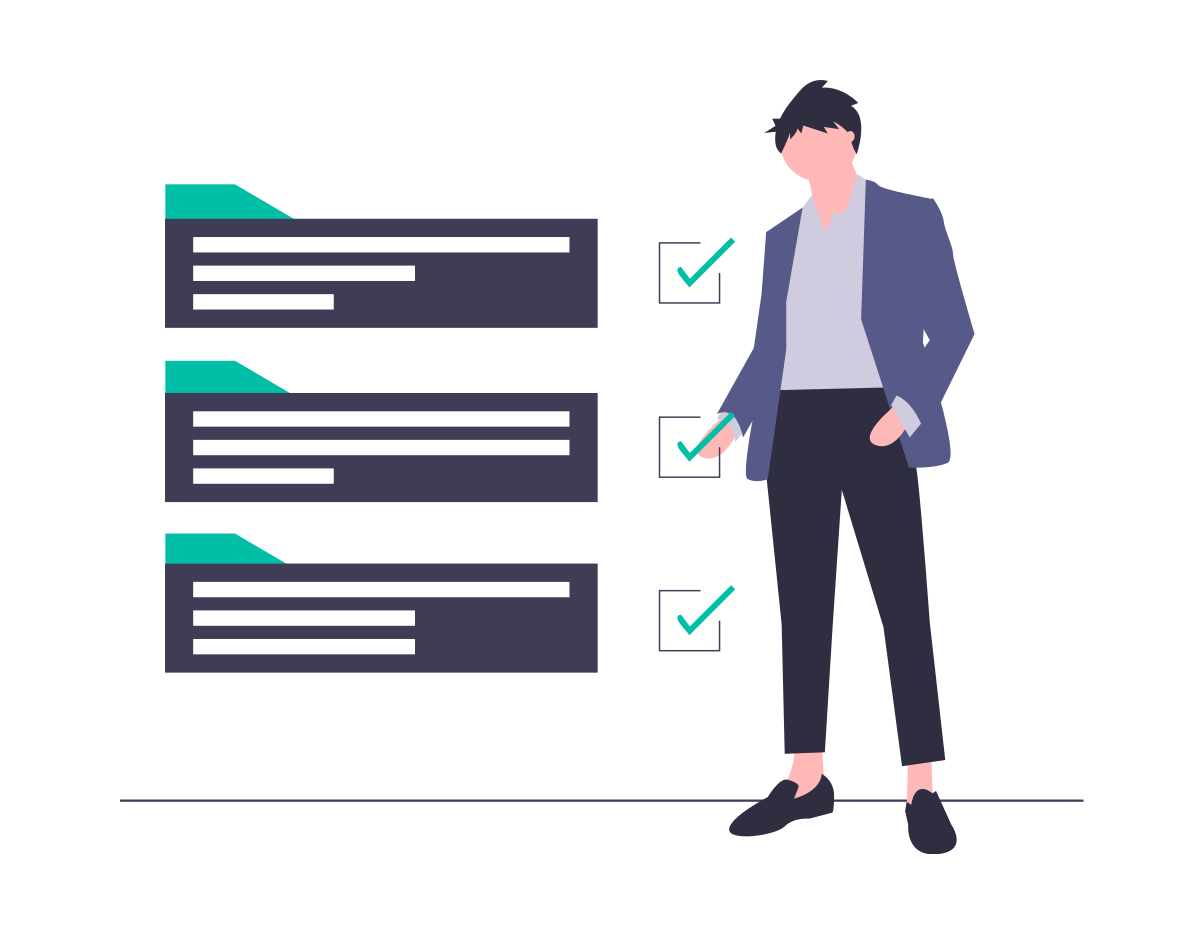

Each method has it's own set of pros and cons. Some examples are:   
* **Pandas** requires a lot more RAM to handle large datasets.
* **Dask** can be slow at times especially with transformations that cannot be parallelized.
* **Datatable** doesn't have a very exhaustive set of data processing functions.
* **Rapids** is not useful if you don't have a GPU.

So it's a good idea to explore various options and finally choose whichever appropriately fits the requirements. I strongly believe in not marrying a technology and continuously adapting to newer ideas, better approaches and ultimately the best possible solutions for building data science pipelines.

Even in my personal experience I've found different approaches working well on different datasets. So don't shy away from experimentation.

> Data Science is blooming under the blessings of open source packages and communities